In [1]:
import torch

In [2]:
from rdkit import Chem

In [3]:
m = Chem.MolFromSmiles('C=C')

In [4]:
m = Chem.AddHs(m)

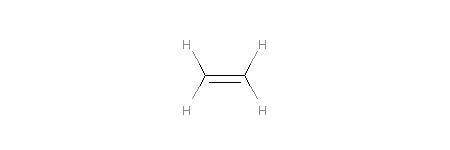

In [5]:
m

## Two useful libraries

Deep Graph Library: https://www.dgl.ai/

Deep Graph Library for Life Sciences: https://lifesci.dgl.ai/

In [24]:
from dgllife.utils import smiles_to_bigraph
from dgllife.utils import mol_to_bigraph

In [7]:
g = smiles_to_bigraph('C=C',explicit_hydrogens=True)

In [8]:
g.nodes()

tensor([0, 1, 2, 3, 4, 5], dtype=torch.int32)

In [9]:
g.edges()

(tensor([2, 3, 2, 4, 2, 5, 3, 0, 3, 1], dtype=torch.int32),
 tensor([3, 2, 4, 2, 5, 2, 0, 3, 1, 3], dtype=torch.int32))

In [10]:
g.adj()

tensor(indices=tensor([[2, 3, 2, 4, 2, 5, 3, 0, 3, 1],
                       [3, 2, 4, 2, 5, 2, 0, 3, 1, 3]]),
       values=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
       size=(6, 6), nnz=10, layout=torch.sparse_coo)

In [11]:
def featurize_atoms(mol):
    feats = []
    for atom in mol.GetAtoms():
        feats.append(atom.GetAtomicNum())
    return {'atomic': torch.tensor(feats).reshape(-1, 1).float()}

In [12]:
def featurize_bonds(mol):
    feats = []
    bond_types = [Chem.rdchem.BondType.SINGLE, Chem.rdchem.BondType.DOUBLE,
                Chem.rdchem.BondType.TRIPLE, Chem.rdchem.BondType.AROMATIC]
    for bond in mol.GetBonds():
        btype = bond_types.index(bond.GetBondType())
        feats.extend([btype, btype])
    return {'type': torch.tensor(feats).reshape(-1, 1).float()}

In [13]:
g = smiles_to_bigraph('C=C', node_featurizer=featurize_atoms, edge_featurizer=featurize_bonds,explicit_hydrogens=True)

In [19]:
g.nodes()

tensor([0, 1, 2, 3, 4, 5], dtype=torch.int32)

In [16]:
g.ndata

{'atomic': tensor([[1.],
        [1.],
        [6.],
        [6.],
        [1.],
        [1.]])}

In [20]:
g.edges()

(tensor([2, 3, 2, 4, 2, 5, 3, 0, 3, 1], dtype=torch.int32),
 tensor([3, 2, 4, 2, 5, 2, 0, 3, 1, 3], dtype=torch.int32))

In [17]:
g.edata

{'type': tensor([[1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])}

In [22]:
from dgl.data.utils import load_graphs
from dgl.data.utils import save_graphs

In [21]:
from dgl.dataloading import GraphDataLoader

In [26]:
def train(epochs):
        
    optimizer = torch.optim.Adam(my_model.parameters(),lr=0.001)
    
    for epoch in tqdm(range(epochs)):
        
        for batch_x, batch_y in dataloader:
            optimizer.zero_grad()
            atoms = batch_x.ndata['atomic']
            edges = batch_x.edata['type']
            y_pred = my_model(batch_x,atoms,edges)
            mse = ((y_pred.reshape(1,-1) - batch_y)**2).sum()
            running += mse.item()
            mse.backward()
            optimizer.step()

Graph convolutions: https://docs.dgl.ai/api/python/nn.html

## Graph Neural Networks for Updating Node and Edge Representation

https://lifesci.dgl.ai/api/model.gnn.html

## Readout for Computing Graph Representation

https://lifesci.dgl.ai/api/model.readout.html

## Example

https://docs.dgl.ai/api/python/nn.pytorch.html#nnconv

https://lifesci.dgl.ai/api/model.gnn.html#module-dgllife.model.gnn.mpnn

https://lifesci.dgl.ai/api/model.readout.html#module-dgllife.model.readout.mlp_readout

https://lifesci.dgl.ai/api/model.zoo.html#module-dgllife.model.model_zoo.mpnn_predictor